In [2]:
import pandas as pd
a=pd.read_csv('dataset.csv')

In [3]:
a=pd.read_csv('dataset.csv')

<span style="font-size: 10px;">
Dataset Overview:
The dataset contains information about penguins from three species: Adelie, Chinstrap, and Gentoo. It includes both numerical and categorical features related to their physical traits. The attributes are as follows:

1.Species: The species of the penguin (categorical: Adelie, Chinstrap, Gentoo).
2.Island: The island where the penguin was observed (categorical: Dream, Torgersen, Biscoe).
3.Bill Length (mm): The length of the penguin's bill in millimeters (numerical).
4.Bill Depth (mm): The depth of the penguin's bill in millimeters (numerical).
5.Flipper Length (mm): The length of the penguin's flippers in millimeters (numerical).
6.Body Mass (g): The penguin's body weight in grams (numerical).
7.Sex: The gender of the penguin (categorical: Male, Female, or Unknown).
Data Handling:
Missing Data:
Missing numerical values are replaced with the average of the corresponding column.
Missing categorical values (such as 'sex') are filled with the most common value (mode).
Rows with 'unknown' in the 'sex' column are discarded to maintain data quality.
Duplicates: Duplicate entries are removed to ensure each observation is unique.
This dataset is ideal for analyzing the physical characteristics of penguins and examining the differences between species in terms of features like bill size, flipper length, and body mass. It also allows exploration of how these traits relate to other variables such as sex or island of origin.
</span>


# Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it (code and explanation)¶

In [4]:
a.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [5]:
a.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,337.000000,342.000000,342.000000,342.000000
mean,43.876855,17.151170,200.915205,4273.976608
std,5.478600,1.974793,14.061714,1119.229602
min,32.100000,13.100000,172.000000,2700.000000
25%,39.200000,15.600000,190.000000,3550.000000
50%,44.100000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,15000.000000


In [6]:
a.isnull()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,False,False,False,False,False
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [7]:
a.isnull().sum()

species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64

In [8]:
counts = a['sex'].value_counts()
print(counts)


male       164
female     162
unknown      2
Name: sex, dtype: int64


<span style="font-size: 10px;">
    
# **Handling missing values in numerical columns:**
# Missing values in the `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g` columns are filled 
# with the mean of each respective column. This approach is commonly used for numerical data to prevent data loss 
# while maintaining the overall distribution. 
</span>



In [9]:

a['bill_length_mm'].fillna(a['bill_length_mm'].mean(), inplace=True)
a['bill_depth_mm'].fillna(a['bill_depth_mm'].mean(), inplace=True)
a['flipper_length_mm'].fillna(a['flipper_length_mm'].mean(), inplace=True)
a['body_mass_g'].fillna(a['body_mass_g'].mean(), inplace=True)


<span style="font-size: 10px;">
    
# **Handling missing values in categorical data:**
# The missing values in the `sex` column are filled with the mode (most frequent value), which is appropriate for categorical variables. 
# This ensures that no data is lost while keeping the most common value for this feature.
# **Removing rows where 'sex' is 'unknown':**
# Rows with 'unknown' in the `sex` column are removed since they are not useful for analysis and could introduce noise into the dataset. 
</span>


In [10]:
mode_sex = a['sex'].mode()[0]
a['sex'].fillna(mode_sex, inplace=True)
a = a[a['sex'] != 'unknown']

<span style="font-size: 10px;">
    
# **Removing duplicate rows:**
# Duplicate rows in the dataset are removed to ensure that each observation is unique and that the analysis is not skewed by repeated data.
</span>


In [11]:
a = a.drop_duplicates()

missing_data = a.isnull().sum()

In [12]:
print(missing_data)

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [13]:
a

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.100000,18.70000,181.000000,3750.000000,male
1,Adelie,Torgersen,39.500000,17.40000,186.000000,3800.000000,female
2,Adelie,Torgersen,40.300000,18.00000,195.000000,3250.000000,female
3,Adelie,Torgersen,43.876855,17.15117,200.915205,4273.976608,male
4,Adelie,Torgersen,36.700000,19.30000,193.000000,3450.000000,female
...,...,...,...,...,...,...,...
338,Chinstrap,Dream,45.700000,17.00000,195.000000,3650.000000,female
339,Chinstrap,Dream,55.800000,19.80000,207.000000,4000.000000,male
340,Chinstrap,Dream,43.500000,18.10000,202.000000,3400.000000,female
341,Chinstrap,Dream,49.600000,18.20000,193.000000,3775.000000,male


# Q2: What is the average body_mass_g for Gentoo penguins? (code)

In [14]:

gentoo_penguins = a[a['species'] == 'Gentoo']

average_body_mass = gentoo_penguins['body_mass_g'].mean()

print(average_body_mass)


5126.806262969251


# Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species. (code and explanation)

<span style="font-size: 10px;">
    
# The code calculates the skewness and kurtosis for the 'bill_length_mm' and 'bill_depth_mm' features 
# for each penguin species in the dataset. Skewness measures the asymmetry of the data, 
# while kurtosis measures the "tailedness" or sharpness of the distribution. The results are 
# stored in a list and then converted into a DataFrame for easy interpretation. 
# After that, histograms with KDE (Kernel Density Estimation) plots are generated to visualize 
# the distribution of these features across different penguin species, providing insights into 
# the spread and shape of the data for each species.
</span>



     Species  Bill Length Skewness  Bill Length Kurtosis  Bill Depth Skewness  \
0     Adelie              0.160350             -0.246441             0.303584   
1     Gentoo              0.712323              1.147647             0.334623   
2  Chinstrap             -0.078094             -0.154123             0.017487   

   Bill Depth Kurtosis  
0            -0.096149  
1            -0.611126  
2            -0.925715  


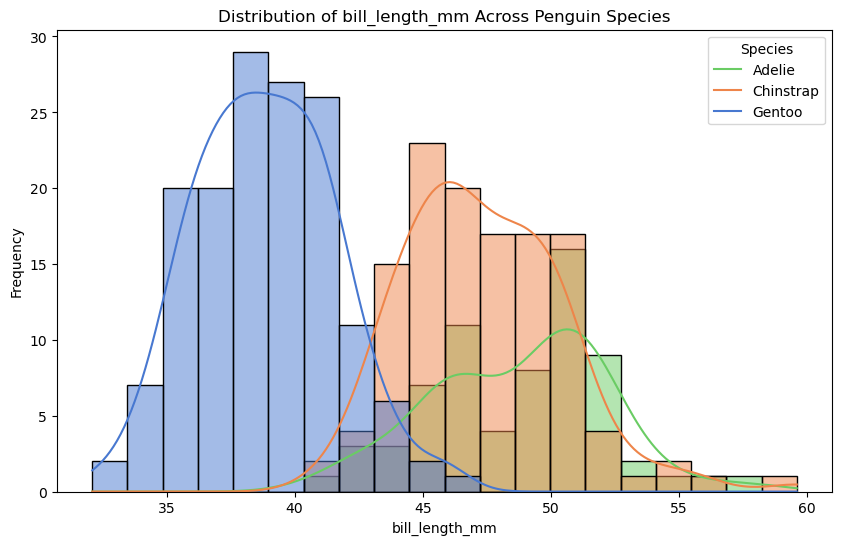

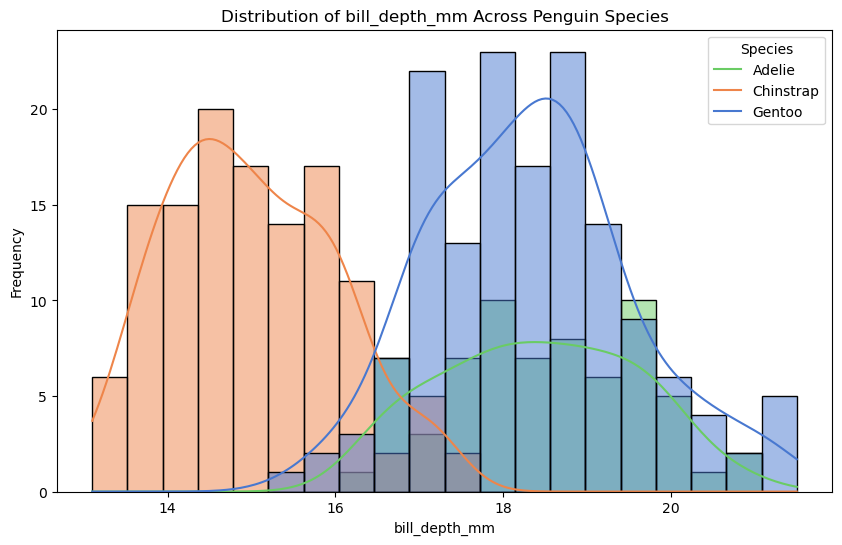

In [15]:

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

species_list = a['species'].unique()
analysis_results = []

for species in species_list:
    subset = a[a['species'] == species]
    
    bill_length_skew = skew(subset['bill_length_mm'].dropna())
    bill_length_kurt = kurtosis(subset['bill_length_mm'].dropna())
    bill_depth_skew = skew(subset['bill_depth_mm'].dropna())
    bill_depth_kurt = kurtosis(subset['bill_depth_mm'].dropna())
    
    analysis_results.append({
        'Species': species,
        'Bill Length Skewness': bill_length_skew,
        'Bill Length Kurtosis': bill_length_kurt,
        'Bill Depth Skewness': bill_depth_skew,
        'Bill Depth Kurtosis': bill_depth_kurt
    })

results_df = pd.DataFrame(analysis_results)
print(results_df)

for feature in ['bill_length_mm', 'bill_depth_mm']:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=a, x=feature, hue='species', kde=True, palette='muted', bins=20)
    plt.title(f"Distribution of {feature} Across Penguin Species")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend(title='Species', labels=['Adelie', 'Chinstrap', 'Gentoo'])
    plt.show()



# Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers. (code and explanation)

<span style="font-size: 10px;">
    
# The code generates boxplots for the numerical features: 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', and 'body_mass_g'.
# - A boxplot is used to visualize the distribution of these numerical features.
# - It shows the median (line inside the box), interquartile range (IQR), whiskers (range excluding outliers), and outliers.
# - The `sns.boxplot()` function is used to plot the boxplots for each feature.
# - The `plt.figure()` function is used to define the size of each plot, and `plt.show()` displays the plot.
# This helps in identifying the central tendency, spread, and presence of outliers for each feature.
</span>


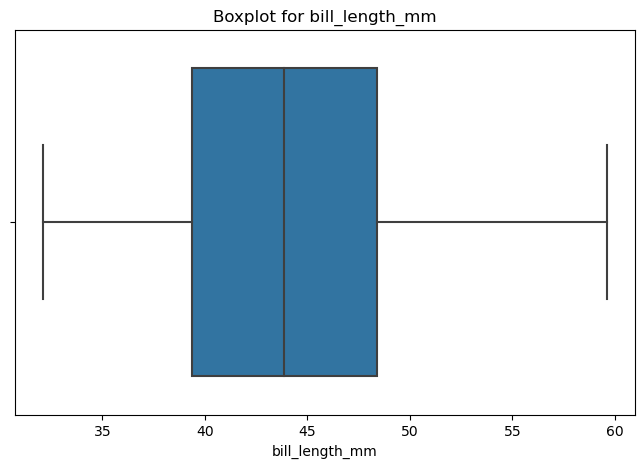

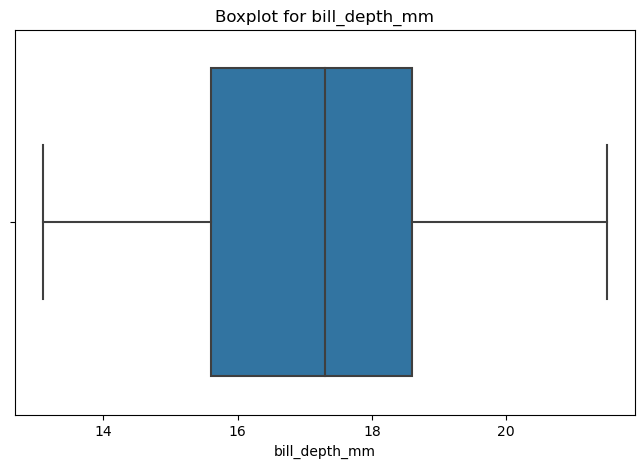

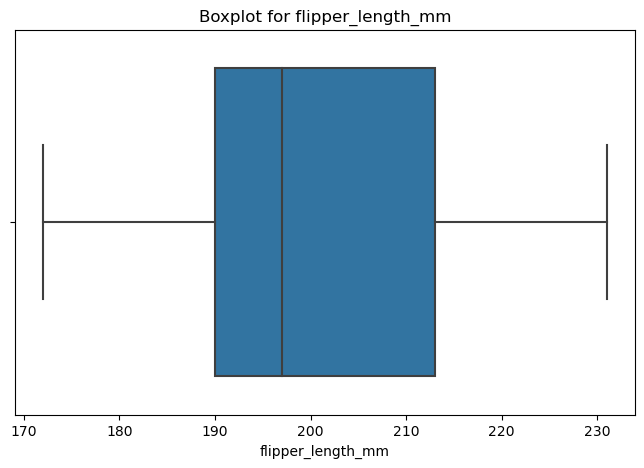

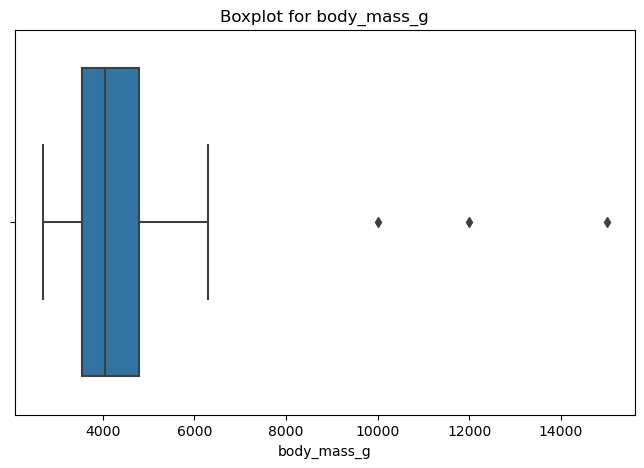

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


numeric_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=a, x=feature)
    plt.title(f"Boxplot for {feature}")
    plt.show()


# Q5: Does this dataset contribute to the curse of dimensionality? If yes perform PCA. (code and explanation required)

<span style="font-size: 10px;">
    
# The code performs PCA (Principal Component Analysis) to reduce the dimensionality of the dataset, 
# focusing on the numerical features: 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', and 'body_mass_g'. 
# First, missing values are dropped and the data is standardized using StandardScaler to ensure all features 
# have the same scale. Then, PCA is applied to reduce the data to two principal components for visualization.
# The explained variance ratio is printed, indicating the proportion of variance captured by each principal component.
# Finally, a scatter plot is created to visualize the PCA result, with points colored by species, 
# showing how the different species are distributed in the reduced 2D space.
</span>


Explained Variance Ratio: [0.61721193 0.19780144]


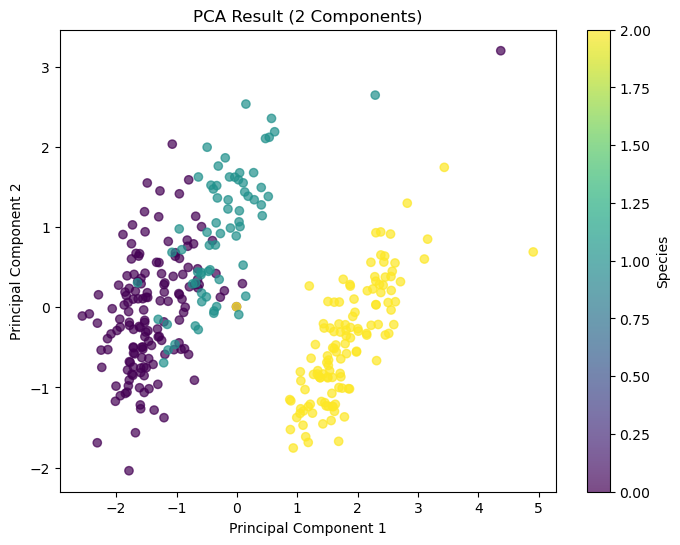

In [17]:
import pandas as pd
import warnings
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", message="The `ci` parameter is deprecated")

numeric_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
data_numeric = a[numeric_features].dropna()


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

pca = PCA(n_components=2)  
pca_result = pca.fit_transform(data_scaled)


explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")


plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=a['species'].dropna().map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}), cmap='viridis', alpha=0.7)
plt.title("PCA Result (2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Species')
plt.show()


# Q6: Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them. (code)

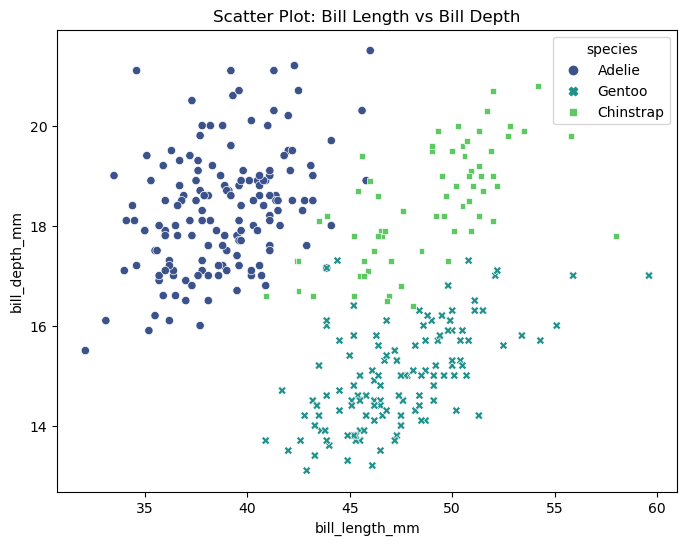

In [18]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=a, x='bill_length_mm', y='bill_depth_mm', hue='species', style='species', palette='viridis')
plt.title("Scatter Plot: Bill Length vs Bill Depth")
plt.show()
plt.close()

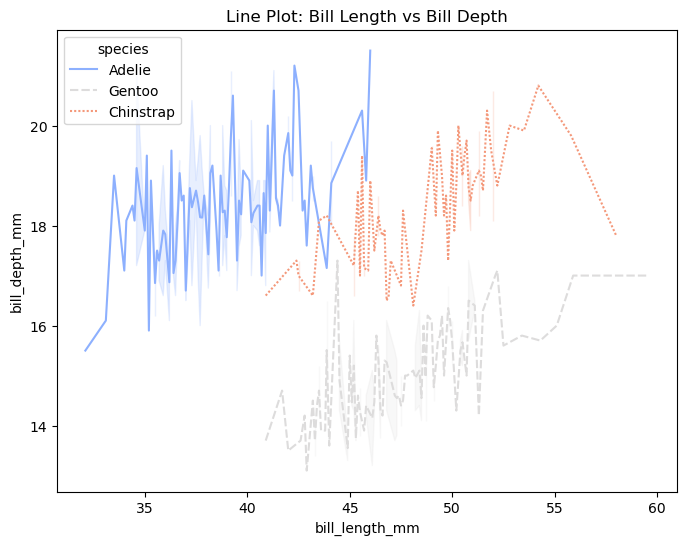

In [19]:
# Line plot
plt.figure(figsize=(8, 6))
sns.lineplot(data=a, x='bill_length_mm', y='bill_depth_mm', hue='species', style='species', palette='coolwarm')
plt.title("Line Plot: Bill Length vs Bill Depth")
plt.show()
plt.close()

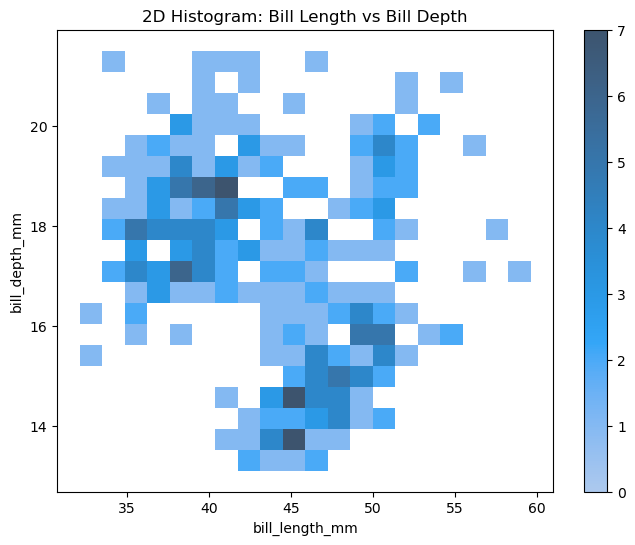

In [20]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=a, x='bill_length_mm', y='bill_depth_mm', bins=20, cbar=True)
plt.title("2D Histogram: Bill Length vs Bill Depth")
plt.show()
plt.close()


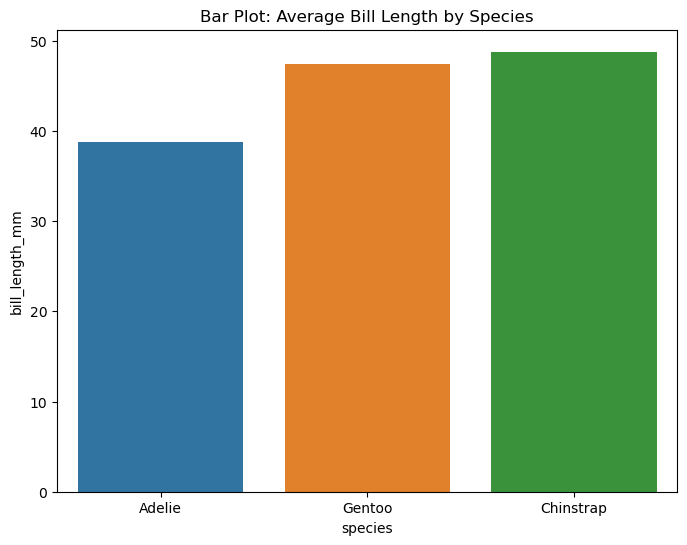

In [21]:
# Bar plot (aggregating by species)
plt.figure(figsize=(8, 6))
sns.barplot(data=a, x='species', y='bill_length_mm', errorbar=None) 
plt.title("Bar Plot: Average Bill Length by Species")
plt.show()


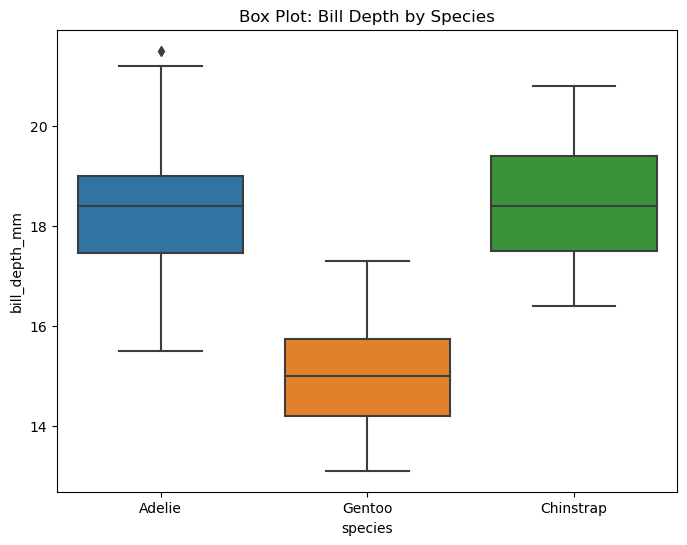

In [22]:

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=a, x='species', y='bill_depth_mm')
plt.title("Box Plot: Bill Depth by Species")
plt.show()

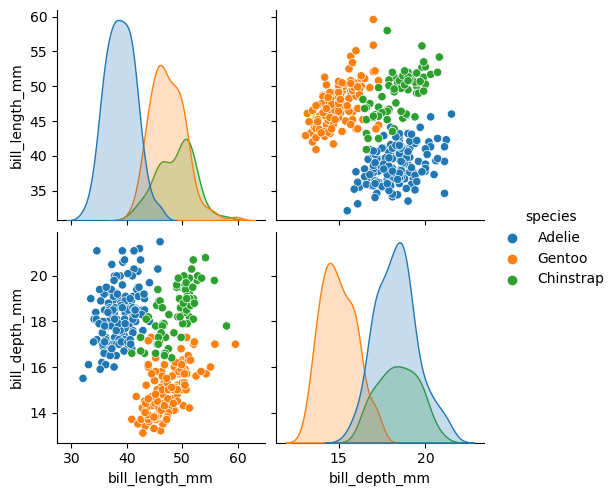

In [23]:
# Pair plot
sns.pairplot(a[['bill_length_mm', 'bill_depth_mm', 'species']], hue='species', height=2.5)
plt.show()


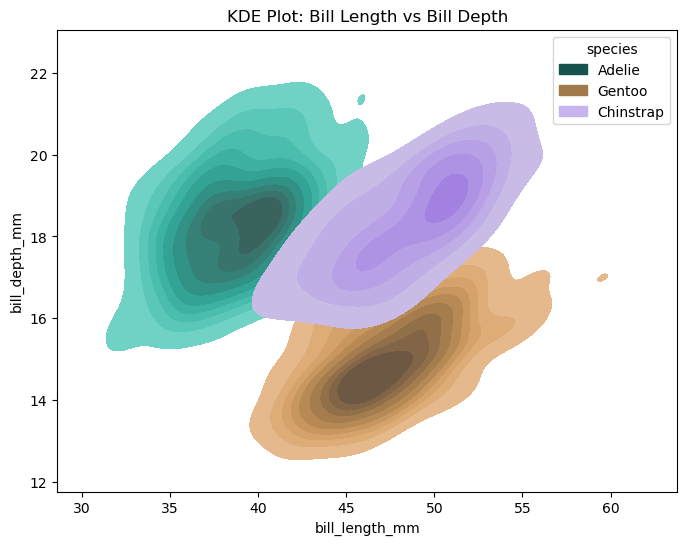

In [24]:
# KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=a, x='bill_length_mm', y='bill_depth_mm', hue='species', fill=True, palette='cubehelix')
plt.title("KDE Plot: Bill Length vs Bill Depth")
plt.show()
plt.close()


# Q7: Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island? (code)

In [25]:
import pandas as pd

max_flipper_length = a.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()
longest_flippers_per_island = max_flipper_length.loc[max_flipper_length.groupby('island')['flipper_length_mm'].idxmax()]

print("Maximum flipper length for each combination of species and island:")
print(max_flipper_length)

print("\nSpecies with the longest flippers on each island:")
print(longest_flippers_per_island)


Maximum flipper length for each combination of species and island:
     species     island  flipper_length_mm
0     Adelie     Biscoe              203.0
1     Adelie      Dream              208.0
2     Adelie  Torgersen              210.0
3  Chinstrap      Dream              212.0
4     Gentoo     Biscoe              231.0

Species with the longest flippers on each island:
     species     island  flipper_length_mm
4     Gentoo     Biscoe              231.0
3  Chinstrap      Dream              212.0
2     Adelie  Torgersen              210.0


# Q8: Perform z-score normalization on this dataset. (code)

In [26]:
from scipy.stats import zscore

a[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = a[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].apply(zscore)

print(a[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].head())


   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       -0.882070       0.799446          -1.422150    -0.471653
1       -0.808161       0.135453          -1.065770    -0.426889
2       -0.660342       0.441911          -0.424286    -0.919293
3        0.000565       0.008360          -0.002674    -0.002547
4       -1.325526       1.105904          -0.566838    -0.740237
